In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import pylab

In [2]:
df=pd.read_csv("C:\\Users\\Neeraj\\Desktop\\archive\\Top YouTube Channels Data .csv")
df

,rank,youtuber,subscribers,video views,video count,category,started
0,1,T-Series,213000000,"188,073,919,029",16708.0,Music,2006
1,2,YouTube Movies,150000000,"167,122,746,349",NaN,Film & Animation,2015
2,3,Cocomelon - Nursery Rhymes,133000000,"126,822,520,940",751.0,Education,2006
3,4,SET India,131000000,"101,541,977,714",78334.0,Shows,2006
4,5,Music,116000000,"78,437,871,689",NaN,Music,2013
...,...,...,...,...,...,...,...
95,96,Markiplier,32600000,"18,011,837,263",5129.0,Gaming,2012
96,97,Like Nastya ESP,32600000,"15,144,858,210",584.0,Entertainment,2017
97,98,Ryan's World,32400000,"51,312,603,726",2155.0,Entertainment,2015
98,99,ABP News,32300000,"9,850,740,503",209351.0,People & Blogs,2012


In [3]:
df.shape

(100, 7)

In [4]:
df.columns

Index(['rank ', 'youtuber', 'subscribers ', 'video views ', 'video count ',
       'category ', 'started '],
      dtype='object')

In [5]:
df['category '].unique()

array(['Music ', 'Film & Animation ', 'Education ', 'Shows ', 'Gaming ',
       'Entertainment ', 'People & Blogs ', 'Sports ', 'How to & Style ',
       'News & Politics', 'Comedy ', 'Trailers ',
       'Nonprofits & Activism '], dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rank          100 non-null    int64  
 1   youtuber      100 non-null    object 
 2   subscribers   100 non-null    int64  
 3   video views   100 non-null    object 
 4   video count   95 non-null     float64
 5   category      100 non-null    object 
 6   started       100 non-null    int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 5.6+ KB


In [7]:
df.describe()

,rank,subscribers,video count,started
count,100.000000,1.000000e+02,95.000000,100.000000
mean,50.500000,5.336300e+07,15847.221053,2010.800000
std,29.011492,2.869713e+07,40955.200388,5.504819
min,1.000000,3.220000e+07,45.000000,1970.000000
25%,25.750000,3.620000e+07,393.500000,2007.750000
50%,50.500000,4.320000e+07,1139.000000,2012.000000
75%,75.250000,5.710000e+07,4986.000000,2014.000000
max,100.000000,2.130000e+08,209351.000000,2018.000000


In [8]:
df=df.set_index('rank ')

In [9]:
df.isna().sum()        #checking null values

youtuber        0
subscribers     0
video views     0
video count     5
category        0
started         0
dtype: int64

In [10]:
df.rename({'rank ':"rank", 'subscribers ':"subscribers", 'video views ':"video_views", 'video count ':"video_count",
       'category ':"category", 'started ':"started"},axis=1,inplace=True)

In [11]:
df.video_count.fillna(df.video_count.median(),inplace=True)      #filling null values   

In [12]:
df.isna().sum()             

youtuber       0
subscribers    0
video_views    0
video_count    0
category       0
started        0
dtype: int64

In [13]:
df["started"].value_counts()                #channels started in respective year

2006    13
2014    12
2013    10
2012    10
2011    10
2015     7
2016     7
2007     7
2008     5
2009     5
2017     5
2005     4
2010     3
2018     1
1970     1
Name: started, dtype: int64

In [14]:
max(df["subscribers"])     

213000000

In [15]:
min(df["subscribers"])

32200000

In [16]:
df.head(1)                           #maximum subscribed channel information

,youtuber,subscribers,video_views,video_count,category,started
rank,,,,,,
1,T-Series,213000000,"188,073,919,029",16708.0,Music,2006


In [17]:
df.tail(1)                           #minimum subscribed channel information

,youtuber,subscribers,video_views,video_count,category,started
rank,,,,,,
100,Desi Music Factory,32200000,"9,115,577,588",122.0,Music,2014


In [18]:
df.iloc[np.where(df["subscribers"]==max(df["subscribers"]))]  #one more method to check #maximum subscribed channel information

,youtuber,subscribers,video_views,video_count,category,started
rank,,,,,,
1,T-Series,213000000,"188,073,919,029",16708.0,Music,2006


In [19]:
df["category"].value_counts()       #which category have more channels

Music                     34
Entertainment             19
People & Blogs            10
Gaming                     8
Education                  6
Film & Animation           5
Shows                      4
Comedy                     4
Sports                     3
News & Politics            3
How to & Style             2
Trailers                   1
Nonprofits & Activism      1
Name: category, dtype: int64

In [20]:
df[df["category"]=='Gaming ']                #gaming channels

,youtuber,subscribers,video_views,video_count,category,started
rank,,,,,,
6,PewDiePie,111000000,"28,260,779,633",4472.0,Gaming,2010
9,Gaming,92100000,"71,692,471,446",1139.0,Gaming,2013
43,JuegaGerman,45500000,"13,400,179,485",1918.0,Gaming,2013
46,Fernanfloo,44800000,"9,834,587,080",541.0,Gaming,2011
57,elrubiusOMG,40400000,"7,429,801,800",704.0,Gaming,2011
59,A4,39400000,"14,391,209,548",582.0,Gaming,2014
93,VEGETTA777,33000000,"14,724,851,921",7007.0,Gaming,2008
96,Markiplier,32600000,"18,011,837,263",5129.0,Gaming,2012


In [21]:
a=df.sort_values("started")               #oldest channel information
a.head(1)

,youtuber,subscribers,video_views,video_count,category,started
rank,,,,,,
94,YouTube,32900000,"2,647,950,108",483.0,News & Politics,1970


In [22]:
a=df.sort_values("started")               #latest channel information
a.tail(1)

,youtuber,subscribers,video_views,video_count,category,started
rank,,,,,,
13,Vlad and Niki,80900000,"62,444,514,631",443.0,Entertainment,2018


In [23]:
df

,youtuber,subscribers,video_views,video_count,category,started
rank,,,,,,
1,T-Series,213000000,"188,073,919,029",16708.0,Music,2006
2,YouTube Movies,150000000,"167,122,746,349",1139.0,Film & Animation,2015
3,Cocomelon - Nursery Rhymes,133000000,"126,822,520,940",751.0,Education,2006
4,SET India,131000000,"101,541,977,714",78334.0,Shows,2006
5,Music,116000000,"78,437,871,689",1139.0,Music,2013
...,...,...,...,...,...,...
96,Markiplier,32600000,"18,011,837,263",5129.0,Gaming,2012
97,Like Nastya ESP,32600000,"15,144,858,210",584.0,Entertainment,2017
98,Ryan's World,32400000,"51,312,603,726",2155.0,Entertainment,2015


In [24]:
df

,youtuber,subscribers,video_views,video_count,category,started
rank,,,,,,
1,T-Series,213000000,"188,073,919,029",16708.0,Music,2006
2,YouTube Movies,150000000,"167,122,746,349",1139.0,Film & Animation,2015
3,Cocomelon - Nursery Rhymes,133000000,"126,822,520,940",751.0,Education,2006
4,SET India,131000000,"101,541,977,714",78334.0,Shows,2006
5,Music,116000000,"78,437,871,689",1139.0,Music,2013
...,...,...,...,...,...,...
96,Markiplier,32600000,"18,011,837,263",5129.0,Gaming,2012
97,Like Nastya ESP,32600000,"15,144,858,210",584.0,Entertainment,2017
98,Ryan's World,32400000,"51,312,603,726",2155.0,Entertainment,2015


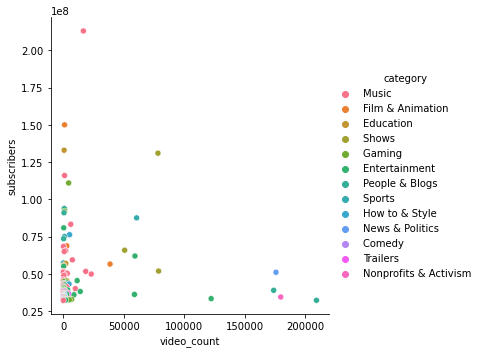

In [25]:
sns.relplot(x="video_count",y="subscribers",data=df,hue="category") #there is no relationship between no. of videos and subscribers

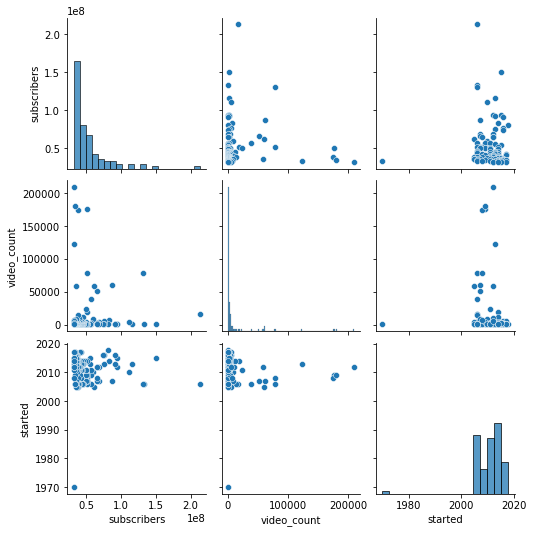

In [26]:
sns.pairplot(df) #no relation between any coloumn 

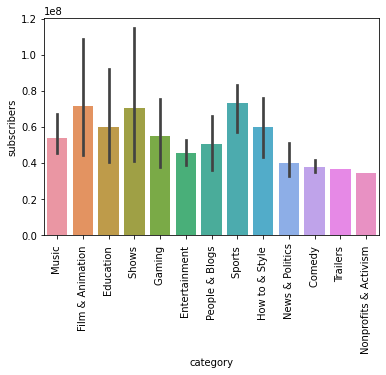

In [27]:
sns.barplot(y="subscribers",x="category",data=df)
plt.xticks(rotation=90);                               #which category have more subscribers

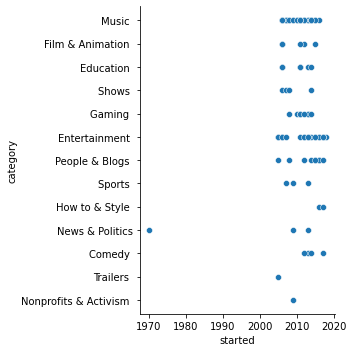

In [28]:
sns.relplot(x="started",y="category",data=df)    #channels category started in which year

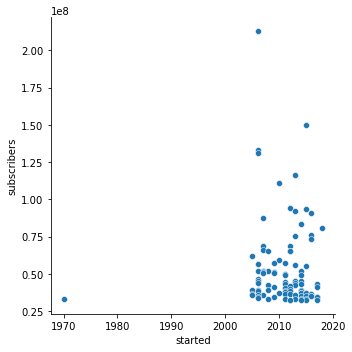

In [29]:
sns.relplot(x="started",y="subscribers",data=df) #subscribers increased after 2007

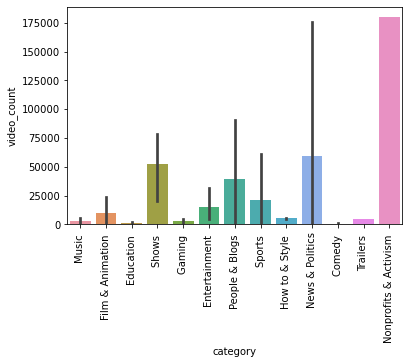

In [30]:
sns.barplot(y="video_count",x="category",data=df)   #which category uploads more videos
plt.xticks(rotation=90);   

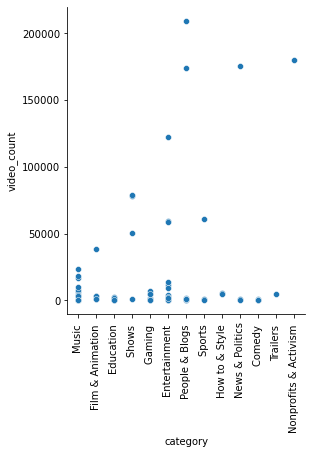

In [31]:
sns.relplot(y="video_count",x="category",data=df)    #which category uploads more videos
plt.xticks(rotation=90);

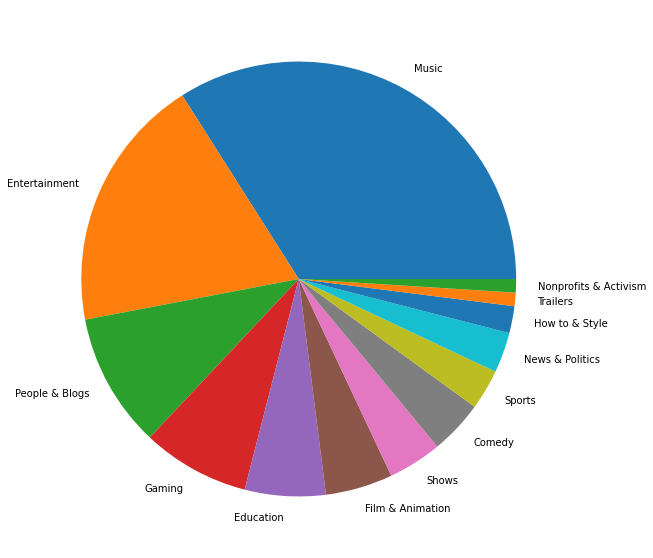

In [32]:
plt.figure(figsize=(10,10))
x=[34,19,10,8,6,5,4,4,3,3,2,1,1]                  #no. of channels of respective category
plt.pie(x,labels=["Music","Entertainment","People & Blogs","Gaming","Education","Film & Animation","Shows","Comedy","Sports","News & Politics","How to & Style","Trailers","Nonprofits & Activism"]);


In [33]:
sns.set(style="darkgrid")

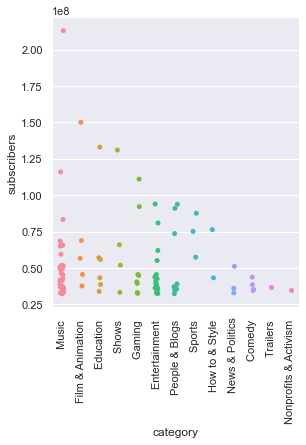

In [34]:
sns.catplot(x="category",y="subscribers",data=df);             
plt.xticks(rotation=90);

In [35]:
df["video_views"]=df["video_views"].str.replace(",","")

In [36]:
df["video_views"]=df["video_views"].astype("int64")

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 1 to 100
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   youtuber     100 non-null    object 
 1   subscribers  100 non-null    int64  
 2   video_views  100 non-null    int64  
 3   video_count  100 non-null    float64
 4   category     100 non-null    object 
 5   started      100 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 9.5+ KB


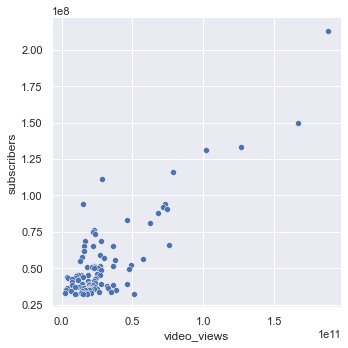

In [38]:
sns.relplot(x="video_views",y="subscribers",data=df)      #therefore video views are related to subscribers

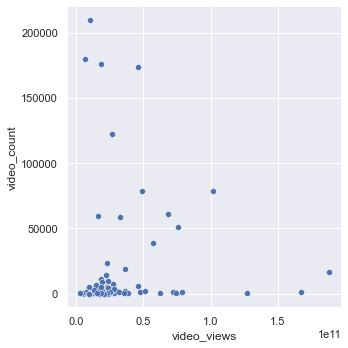

In [39]:
sns.relplot(x="video_views",y="video_count",data=df)   

# MachineLearning

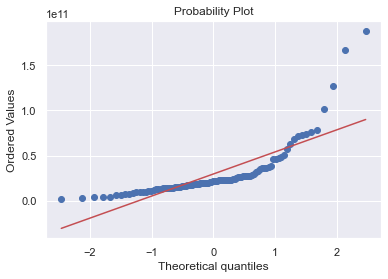

In [40]:
st.probplot(df["video_views"],dist="norm",plot=pylab);

# transforming to normal dist

In [41]:
x=st.yeojohnson(df["video_views"])

C:\Users\Neeraj\anaconda3\lib\site-packages\scipy\stats\morestats.py:1557: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(trans.var(axis=0))
C:\Users\Neeraj\anaconda3\lib\site-packages\scipy\optimize\optimize.py:2214: RuntimeWarning: invalid value encountered in double_scalars
  tmp1 = (x - w) * (fx - fv)
C:\Users\Neeraj\anaconda3\lib\site-packages\scipy\optimize\optimize.py:2215: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


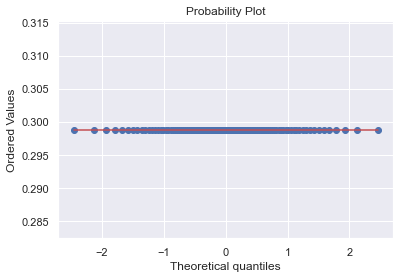

In [42]:
st.probplot(x[0],dist="norm",plot=pylab);

In [43]:
y=df["subscribers"]

# checking multicolinearity

<AxesSubplot:>

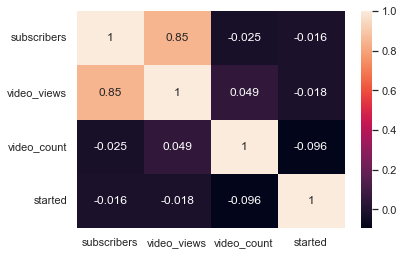

In [44]:
sns.heatmap(df.corr(),annot=True)

# scaling x 

standardization because column is normally distributed

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
scaler=StandardScaler()

In [50]:
scaler.fit_transform(x)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

# training and testing

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.10,random_state=123)

# applying model

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr=LinearRegression()
lr.fit(x_train,y_train)

finding m and c

In [ ]:
lr.intercept_